# Finding the closest pair of points

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time

plt.style.use("ggplot")

%matplotlib inline

## Merge Sort

In [3]:
X = np.random.rand(64,2)

In [4]:
def sort_2(array):
    if array[0][0] > array[1][0]:
        return np.array([array[1], array[0]])
    else:
        return array

In [5]:
X[:2]

array([[0.55026409, 0.8207673 ],
       [0.50570866, 0.34651486]])

In [6]:
sort_2(X[:2])

array([[0.50570866, 0.34651486],
       [0.55026409, 0.8207673 ]])

In [7]:
def sort_nest(array, coordinate=0):
    
    length = len(array)
    
    if length == 2:
        if array[0][coordinate] > array[1][coordinate]:
            return np.array([array[1], array[0]])
        else:
            return array
    
    elif length > 2:
        array_l = array[:int(length/2)]
        array_r = array[int(length/2):]
        array_l_sorted = sort_nest(array_l, coordinate)
        array_r_sorted = sort_nest(array_r, coordinate)

        l = 0
        r = 0
        
        sorted_list = []
        
        for i in range(length):
            if r == int(length/2):
                sorted_list.append(array_l_sorted[l])
                l += 1

            elif l == int(length/2):
                sorted_list.append(array_r_sorted[r])
                r += 1             
                
            elif array_l_sorted[l][coordinate] > array_r_sorted[r][coordinate]:
                sorted_list.append(array_r_sorted[r])
                r += 1
                
            elif array_l_sorted[l][coordinate] < array_r_sorted[r][coordinate]:
                sorted_list.append(array_l_sorted[l])
                l += 1
        
        return np.array(sorted_list)

In [8]:
X = np.random.rand(64,2)

In [9]:
sort_nest(X)

array([[0.01529908, 0.3711909 ],
       [0.03005296, 0.41914522],
       [0.0516552 , 0.39108384],
       [0.05423615, 0.92300069],
       [0.07114883, 0.98150559],
       [0.0781999 , 0.57644516],
       [0.0973662 , 0.30505327],
       [0.13762921, 0.41093139],
       [0.18842968, 0.52238147],
       [0.19702496, 0.45547581],
       [0.21701202, 0.78791032],
       [0.24040931, 0.71148793],
       [0.25226902, 0.96224241],
       [0.25454039, 0.8901669 ],
       [0.27669288, 0.40683754],
       [0.28401163, 0.09256923],
       [0.29049384, 0.55023994],
       [0.33154667, 0.70403426],
       [0.33929704, 0.0840711 ],
       [0.35398407, 0.46950218],
       [0.3647425 , 0.65646873],
       [0.36682162, 0.56787907],
       [0.37254659, 0.54324203],
       [0.39512821, 0.06450089],
       [0.40345661, 0.65639206],
       [0.41204047, 0.6977378 ],
       [0.44647855, 0.08548637],
       [0.45305754, 0.43221481],
       [0.45427037, 0.24993938],
       [0.46808929, 0.11455478],
       [0.

In [10]:
sort_nest(X, 1)

array([[0.96401987, 0.00586892],
       [0.86224844, 0.01321787],
       [0.58612119, 0.05318223],
       [0.39512821, 0.06450089],
       [0.33929704, 0.0840711 ],
       [0.44647855, 0.08548637],
       [0.72414748, 0.09029236],
       [0.28401163, 0.09256923],
       [0.46808929, 0.11455478],
       [0.76482625, 0.15292016],
       [0.89963557, 0.16772273],
       [0.80231361, 0.17597065],
       [0.94998008, 0.18764625],
       [0.51144704, 0.19002927],
       [0.51449013, 0.19243359],
       [0.47492322, 0.203652  ],
       [0.4946016 , 0.22893034],
       [0.45427037, 0.24993938],
       [0.71060735, 0.26365598],
       [0.53868439, 0.27783848],
       [0.0973662 , 0.30505327],
       [0.81267585, 0.33841882],
       [0.86689454, 0.36975463],
       [0.01529908, 0.3711909 ],
       [0.94181296, 0.38797227],
       [0.0516552 , 0.39108384],
       [0.27669288, 0.40683754],
       [0.13762921, 0.41093139],
       [0.03005296, 0.41914522],
       [0.45305754, 0.43221481],
       [0.

## Finding the Closest Pair of Points

In [11]:
X = np.random.rand(64,2)

In [12]:
def find_closest_4(array):
    sorted_array = sort_nest(array)
    length = len(sorted_array)
    array_l = sorted_array[:int(length/2)]
    array_r = sorted_array[int(length/2):]
    
    dict_l = {}
    dict_l["p1"] = array_l[0]
    dict_l["p2"] = array_l[1]
    dict_l["distance"] = np.sqrt((array_l[0][0]-array_l[1][0])**2+(array_l[0][1]-array_l[1][1])**2)
    dict_r = {}
    dict_r["p1"] = array_r[0]
    dict_r["p2"] = array_r[1]
    dict_r["distance"] = np.sqrt((array_r[0][0]-array_r[1][0])**2+(array_r[0][1]-array_r[1][1])**2)
    
    if dict_l["distance"] > dict_r["distance"]:
        dict_both = dict_r
    else:
        dict_both = dict_l
    
    distance_cross = np.sqrt((sorted_array[1][0]-sorted_array[2][0])**2+(sorted_array[1][1]-sorted_array[2][1])**2)
    if distance_cross > dict_both["distance"]:
        dict_final = dict_both
    else:
        dict_final = {}
        dict_final["p1"] = sorted_array[1]
        dict_final["p2"] = sorted_array[2]
        dict_final["distance"] = distance_cross
    
    return(dict_final)

In [13]:
X[:4]

array([[0.61817787, 0.92940418],
       [0.77680257, 0.51703796],
       [0.49900534, 0.57295324],
       [0.82995082, 0.50082536]])

In [14]:
find_closest_4(X[:4])

{'p1': array([0.77680257, 0.51703796]),
 'p2': array([0.82995082, 0.50082536]),
 'distance': 0.05556603667338933}

In [20]:
def find_closest_nest(array):
    X = sort_nest(array, 0)
    length = len(X)
    if length < 4:
        return find_closest_brute_force(array)
    
    else:
        array_l = X[:int(length/2)]
        array_r = X[int(length/2):]

        dict_l = find_closest_nest(array_l)
        dict_r = find_closest_nest(array_r)
                    
        if dict_l["distance"] > dict_r["distance"]:
            dict_both = dict_r
        else:
            dict_both = dict_l
        
        Y = sort_nest(array, 1)
        
        Y_list = []
        for i in range(length):
            if X[int(length/2-1)][0]-dict_both["distance"] < Y[i][0] < X[int(length/2-1)][0]+dict_both["distance"]:
                Y_list.append(Y[i])

        Y = np.array(Y_list)
        if len(Y) == 1:
            dict_final = dict_both
        elif len(Y) < 8:
            dict_y = find_closest_brute_force(Y)
            if dict_both["distance"] > dict_y["distance"]:
                dict_final = dict_y
            else:
                dict_final = dict_both            
        else:
            for i in range(len(Y)-7):
                dict_y = find_closest_brute_force(Y[i:i+7])        
                
                if dict_both["distance"] > dict_y["distance"]:
                    dict_final = dict_y
                else:
                    dict_final = dict_both
    
        return dict_final

In [21]:
find_closest_nest(X)

{'p1': array([0.74768368, 0.56424011]),
 'p2': array([0.73902457, 0.56494181]),
 'distance': 0.00868749456610089}

### Brute Force Function

In [17]:
def find_closest_brute_force(array):
    
    dict_final = {}
    dict_final["p1"] = array[0]
    dict_final["p2"] = array[1]
    dict_final["distance"] = np.sqrt((array[0][0]-array[1][0])**2+(array[0][1]-array[1][1])**2)
    
    for i in range(len(array)-1):
        for j in range(i+1, len(array)):
            distance = np.sqrt((array[i][0]-array[j][0])**2+(array[i][1]-array[j][1])**2)
            if distance < dict_final["distance"]:
                dict_final["p1"] = array[i]
                dict_final["p2"] = array[j]
                dict_final["distance"] = distance

    return dict_final

In [18]:
find_closest_brute_force(X)

{'p1': array([0.73902457, 0.56494181]),
 'p2': array([0.74768368, 0.56424011]),
 'distance': 0.00868749456610089}

### Performance Check

In [19]:
Z = np.random.rand(2**10,2)
Z.shape

(1024, 2)

In [94]:
start_time = time.time()
find_closest_brute_force(Z)
print("--- %s seconds ---" % (time.time() - start_time))

--- 3.3881092071533203 seconds ---


In [95]:
start_time = time.time()
find_closest_nest(Z)
print("--- %s seconds ---" % (time.time() - start_time))

--- 0.5066041946411133 seconds ---


In [96]:
Z = np.random.rand(2**12,2)
Z.shape

(4096, 2)

In [97]:
start_time = time.time()
find_closest_brute_force(Z)
print("--- %s seconds ---" % (time.time() - start_time))

--- 53.920708894729614 seconds ---


In [98]:
start_time = time.time()
find_closest_nest(Z)
print("--- %s seconds ---" % (time.time() - start_time))

--- 3.2317519187927246 seconds ---


In [22]:
time_list = []
for i in range(2, 15):
    Z = np.random.rand(2**i, 2)
    
    start_time = time.time()
    find_closest_brute_force(Z)
    brute = time.time() - start_time

    start_time = time.time()
    find_closest_nest(Z)
    nest = time.time() - start_time
    
    time_list.append([brute, nest])
    print("i={}: completed".format(i))

i=2: completed
i=3: completed
i=4: completed
i=5: completed
i=6: completed
i=7: completed
i=8: completed
i=9: completed
i=10: completed
i=11: completed
i=12: completed
i=13: completed
i=14: completed


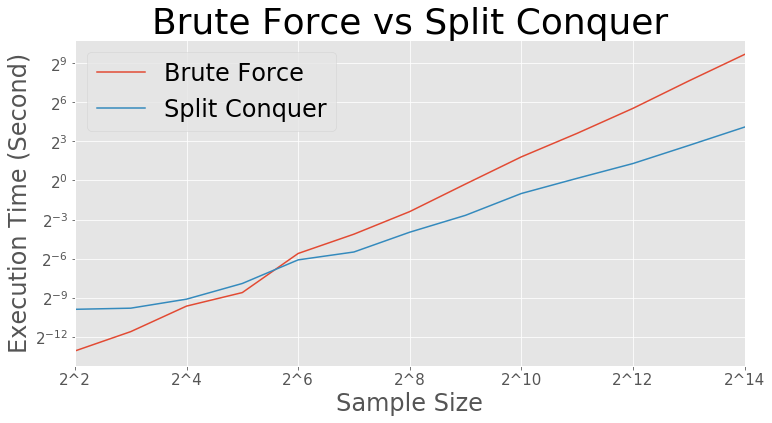

In [23]:
time_df = pd.DataFrame(time_list, index=range(2, 15), columns=["brute_force", "split_conquer"])
time_df.plot(figsize=(12, 6))

plt.title("Brute Force vs Split Conquer", fontsize=36)
plt.legend(["Brute Force", "Split Conquer"], fontsize=24)
plt.xlabel("Sample Size", fontsize = 24)
plt.xticks(np.arange(2, 15, 2), labels = ["2^{}".format(i) for i in range(2, 15, 2)], fontsize=15)
plt.yticks(fontsize=15)
plt.yscale("log", basey=2)
plt.ylabel("Execution Time (Second)", fontsize = 24)
plt.savefig("image/find_closest.png")
plt.show()